In [43]:
pwd

u'/Users/Tultul/Dropbox/DSI_G/week10/day1'

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
from datetime import datetime
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from bs4 import BeautifulSoup
from time import gmtime
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [19]:
def load_DataSet(file):
    dataMat = []; labelMat = []
    fr = open(file)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [ ]:
import pca

def loadDataSet(filename, delim='\t'):
    fr = open(filename)
    stringArr = [line.strip().split(delim) for line in fr.readlines() ]
    dataArr = [map(float, line) for line in stringArr]
    return mat(dataArr)

def pca(dataMat, topNfeat=999999):
    meanvals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanvals
    covMat = cov(meanRemoved, rowVar=0)
    eigVals, eigVect = linalg.eig(mat(covMat))
    eigValsInd = argsort(eigVals)
    eigValsInd = eigValsInd[:-(topNfeat+1):-1]
    
    

In [122]:
delinq_df = pd.read_csv('~/Downloads/DelinqData_250K.csv')

In [124]:
    old_names = ['label', 'msisdn', 'aon', 'daily_decr90',                 
                  'rental90', 'last_rech_date_ma',                  
                 'last_rech_amt_ma',                   
                 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',                 
                  'cnt_loans90',                 
                  'amnt_loans90',  'maxamnt_loans90', 'payback90',                  
                 'daily_decr30', 'rental30', 'last_rech_date_da', 'cnt_ma_rech30','sumamnt_ma_rech30', 'fr_ma_rech30',                   
                 'cnt_loans30', 'cnt_da_rech30', 'amnt_loans30', 'maxamnt_loans30', 'payback30', 'cnt_da_rech90']
    
    new_names =  ['label',  'mobNum',  'ageOnCellNtwrk', 'dailyAmtSpnt90',                   
                  'avgAcntBal90', 'numDaysTillRchrgM',                     
                  'amtLastRchrgM',                     
                  'numRchrgM90', 'frqMRchrg90',  'totAmtRchrgM90',                   
                   'numLoans90',                  
                   'amtLoans90',  'maxAmtLoans90', 'avgPaybkTmDyIn90',                  
                  'dailyAmtSpnt30', 'avgAcntBal30', 'numDaysTillRchrgD', 'numTimesMRchrg30', 'totAmtRchrgM30','frqMRchrg30',                    
                  'numLoans30','numTimesDRchrg30', 'amtLoans30', 'maxAmtLoans30', 'avgPaybkTmDyIn30', 'numTimesDRchrg90']

In [125]:
delinq_df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [126]:
delinq_df.drop(['dailyAmtSpnt30', 'avgAcntBal30', 'numDaysTillRchrgD', 'numTimesMRchrg30', 'totAmtRchrgM30','frqMRchrg30', 'numLoans30','numTimesDRchrg30', 'amtLoans30', 'maxAmtLoans30', 'avgPaybkTmDyIn30', 'numTimesDRchrg90'], axis=1, inplace=True)

In [127]:
delinq_df['dailyAmtSpnt90'] = delinq_df['dailyAmtSpnt90'].round(2)

# delinq_df['avgPaybkTmDyIn30'] = delinq_df['avgPaybkTmDyIn30'].round(2)
# delinq_df['avgPaybkTmDyIn90'] = delinq_df['avgPaybkTmDyIn90'].round(2)

delinq_df['amtLastRchrgM'].fillna(0, inplace=True)
delinq_df['numDaysTillRchrgM'].fillna(0, inplace=True)
delinq_df['frqMRchrg90'].fillna(0, inplace=True)
delinq_df['amtLastRchrgM'].fillna(0, inplace=True)
delinq_df['numDaysTillRchrgM'].fillna(0, inplace=True)
delinq_df['maxAmtLoans90'].fillna(0, inplace=True)
delinq_df['avgPaybkTmDyIn90'].fillna(0, inplace=True)

delinq_df['numDaysTillRchrgM'] = delinq_df['numDaysTillRchrgM'].astype(int)

In [128]:
delinq_df.head(3)

label      mobNum  ageOnCellNtwrk  dailyAmtSpnt90  avgAcntBal90  \
0      1  8535032161            1072         9191.40       2007.28   
1      1  8535032225             212          153.38       1029.21   
2      1  8535032320            1023           22.49         90.00   

   numDaysTillRchrgM  amtLastRchrgM  numRchrgM90  frqMRchrg90  totAmtRchrgM90  \
0                  7          773.0           10          5.0           10897   
1                  2          770.0           19          1.0           17747   
2                  7         2309.0            2         59.0            4029   

   numLoans90  amtLoans90  maxAmtLoans90  avgPaybkTmDyIn90  
0           2          12            6.0               2.0  
1           1           6            6.0               0.0  
2           2          12            6.0               0.0

In [34]:
delinq_df.isnull().any()

label                False
mobNum               False
ageOnCellNtwrk       False
dailyAmtSpnt90       False
avgAcntBal90         False
numDaysTillRchrgM    False
amtLastRchrgM        False
numRchrgM90          False
frqMRchrg90          False
totAmtRchrgM90       False
numLoans90           False
amtLoans90           False
maxAmtLoans90        False
avgPaybkTmDyIn90     False
dtype: bool

In [36]:
count_nan_maxAmtLoans90 = len(delinq_df['maxAmtLoans90']) - delinq_df['maxAmtLoans90'].count()
count_nan_maxAmtLoans90

0

In [37]:
count_nan_numDaysTillRchrgM = len(delinq_df['numDaysTillRchrgM']) - delinq_df['numDaysTillRchrgM'].count()
count_nan_numDaysTillRchrgM

0

In [38]:
delinq_df.shape

(250000, 14)

In [39]:
X = delinq_df.drop(['label'], axis=1)
y = delinq_df['label'].values.astype(int)

In [40]:
X.shape

(250000, 13)

In [41]:
y.shape

(250000,)

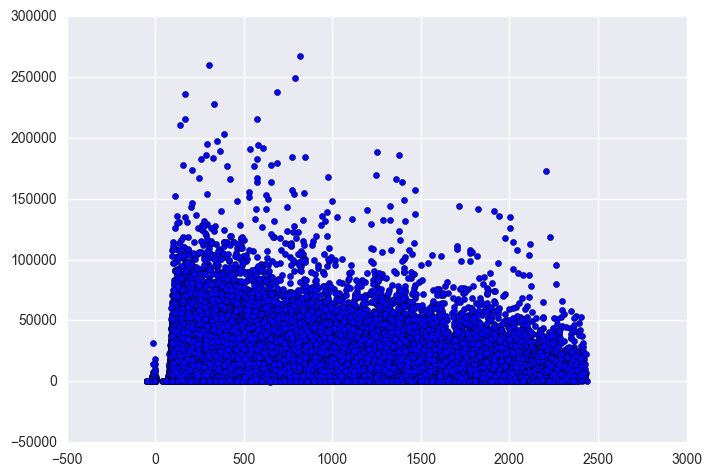

In [46]:
plt.scatter(delinq_df['ageOnCellNtwrk'], delinq_df['dailyAmtSpnt90'])

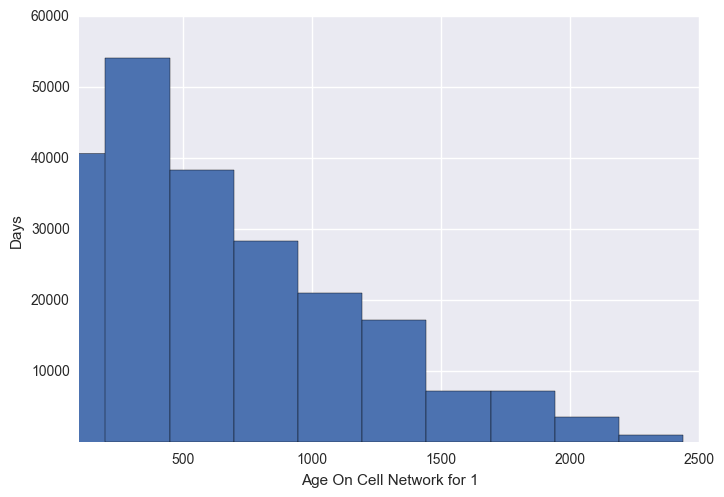

In [49]:
plt.hist(delinq_df[delinq_df.label == 1]['ageOnCellNtwrk'])
plt.xlim(100,)
plt.ylim(10,)
plt.xlabel('Age On Cell Network for 1')
plt.ylabel('Days')
plt.show()

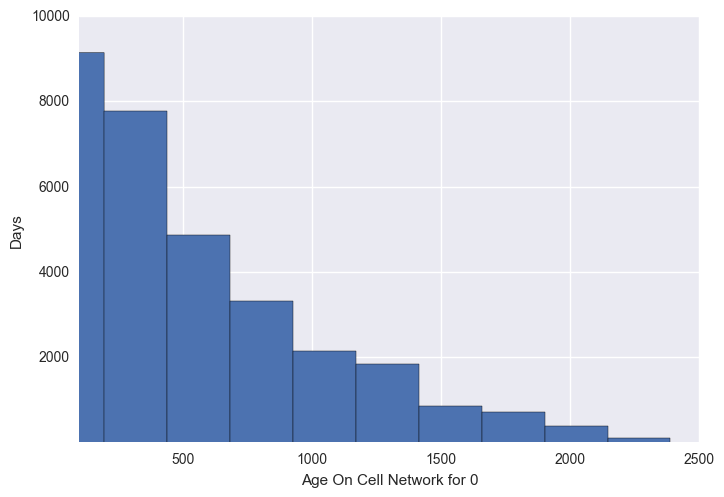

In [50]:
plt.hist(delinq_df[delinq_df.label == 0]['ageOnCellNtwrk'])
plt.xlim(100,)
plt.ylim(10,)
plt.xlabel('Age On Cell Network for 0')
plt.ylabel('Days')
plt.show()

(0, 250000.0)

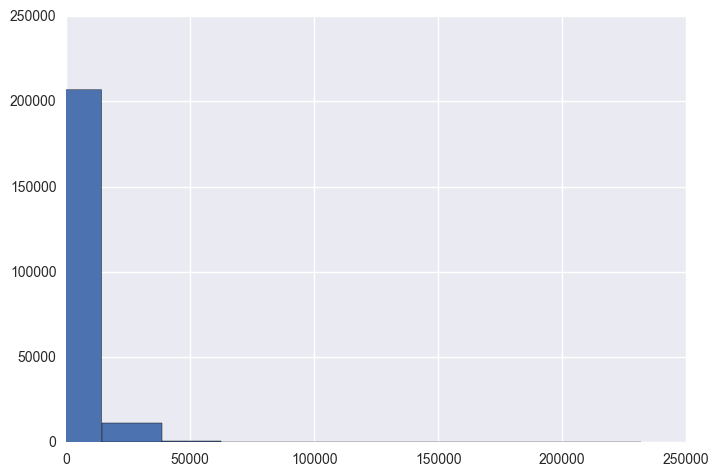

In [51]:
plt.hist(delinq_df[delinq_df.label == 1]['avgAcntBal90'])
plt.xlim(0,)
plt.ylim(0,)

(0, 30000.0)

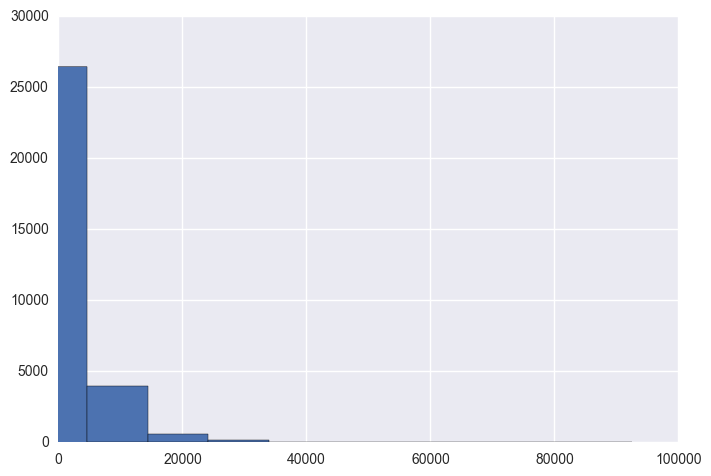

In [52]:
plt.hist(delinq_df[delinq_df.label == 0]['avgAcntBal90'])
plt.xlim(0,)
plt.ylim(0,)

(-100, 2000)

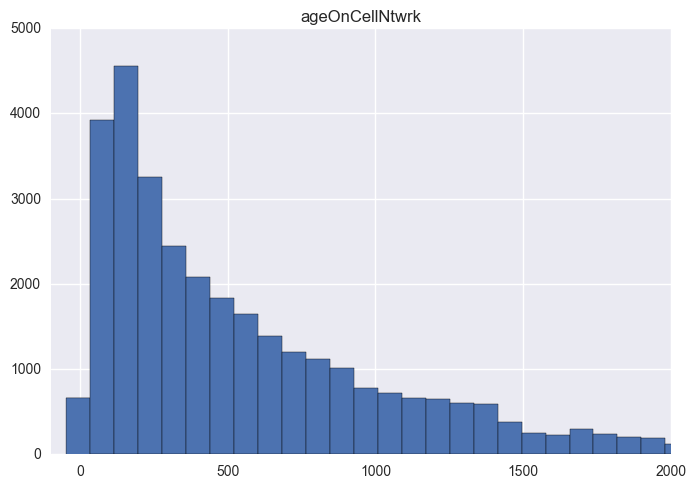

In [53]:
delinq_df[delinq_df.label == 0].hist(column="ageOnCellNtwrk",bins=30)
plt.xlim(-100, 2000)

(-100, 2000)

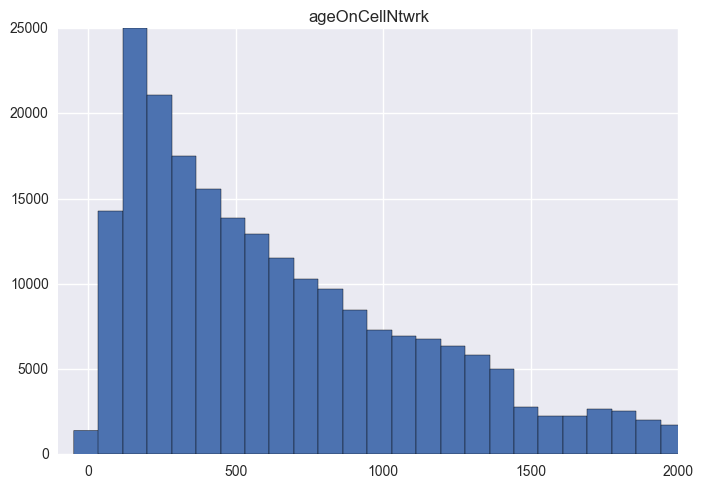

In [54]:
delinq_df[delinq_df.label == 1].hist(column="ageOnCellNtwrk",bins=30)
plt.xlim(-100, 2000)

(-1000, 20000)

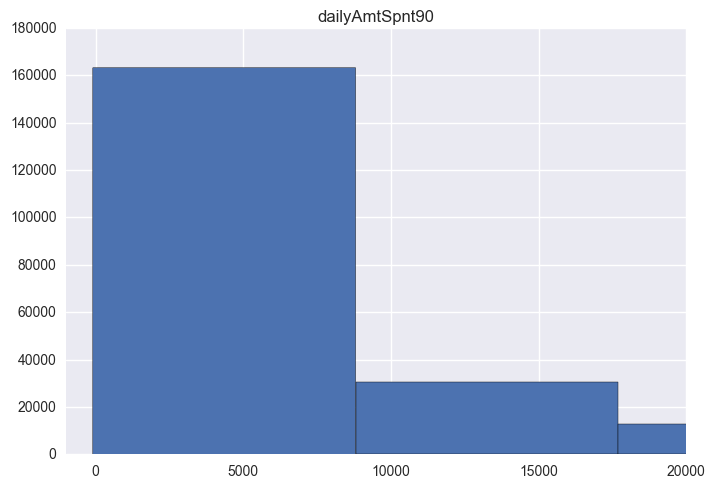

In [56]:
delinq_df[delinq_df.label == 1].hist(column="dailyAmtSpnt90",bins=30)
plt.xlim(-1000, 20000)

(-1000, 20000)

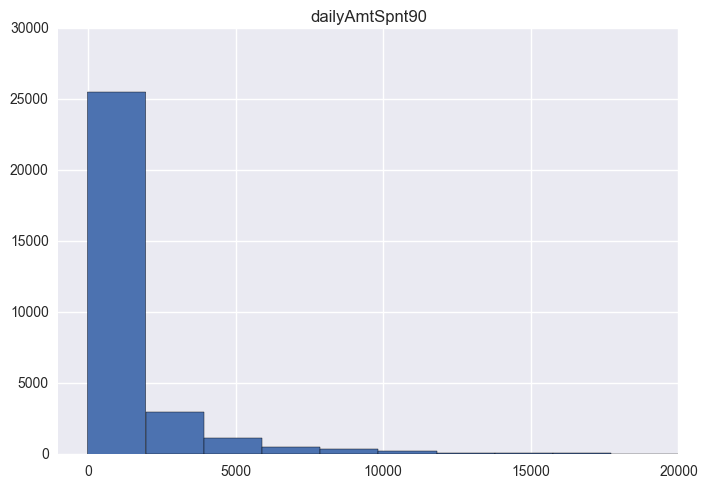

In [57]:
delinq_df[delinq_df.label == 0].hist(column="dailyAmtSpnt90",bins=30)
plt.xlim(-1000, 20000)

(-10, 200)

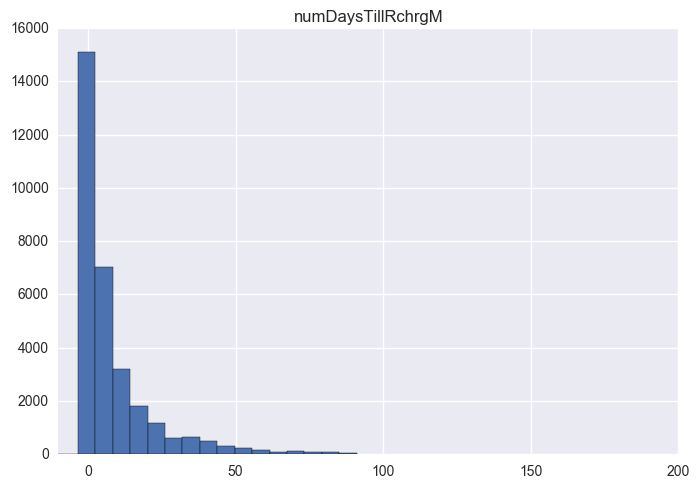

In [59]:
delinq_df[delinq_df.label == 0].hist(column="numDaysTillRchrgM",bins=20)
plt.xlim(-10, 200)

(-10, 200)

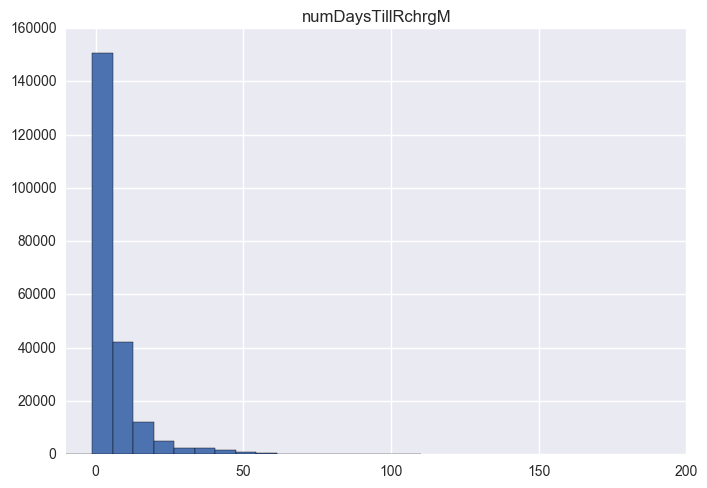

In [60]:
delinq_df[delinq_df.label == 1].hist(column="numDaysTillRchrgM",bins=20)
plt.xlim(-10, 200)

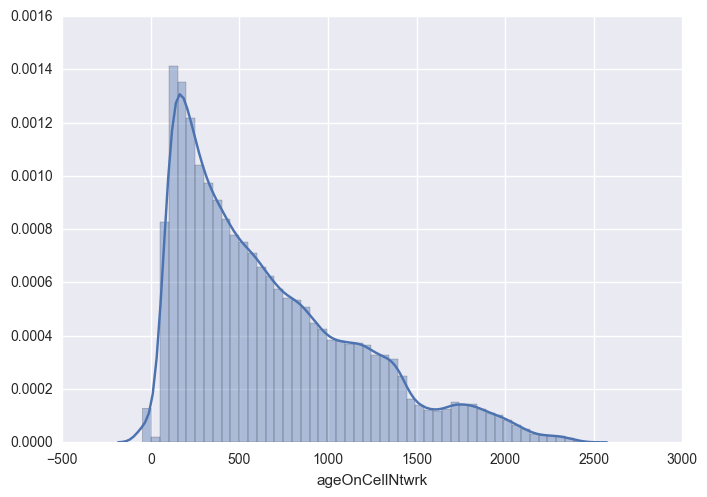

In [63]:
sns.distplot(delinq_df[delinq_df.label == 1].ageOnCellNtwrk, kde=True, norm_hist=True)

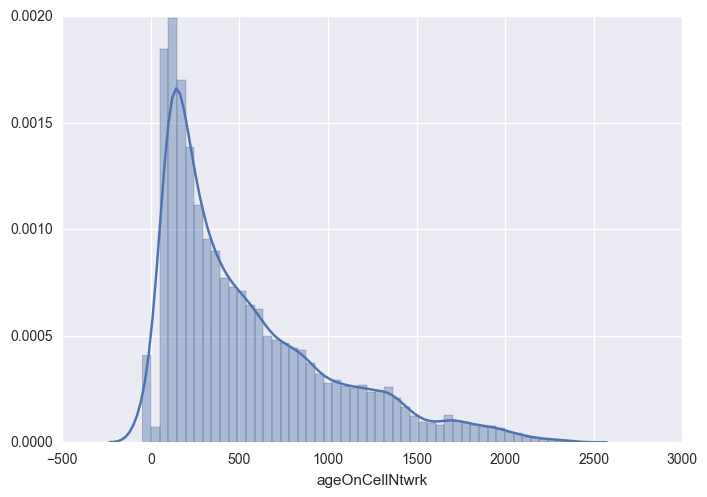

In [62]:
sns.distplot(delinq_df[delinq_df.label == 0].ageOnCellNtwrk, kde=True, norm_hist=True)

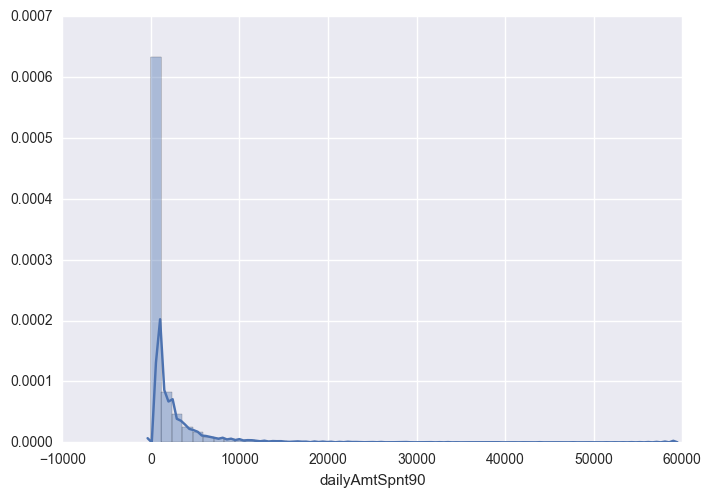

In [64]:
sns.distplot(delinq_df[delinq_df.label == 0].dailyAmtSpnt90, kde=True, norm_hist=True)

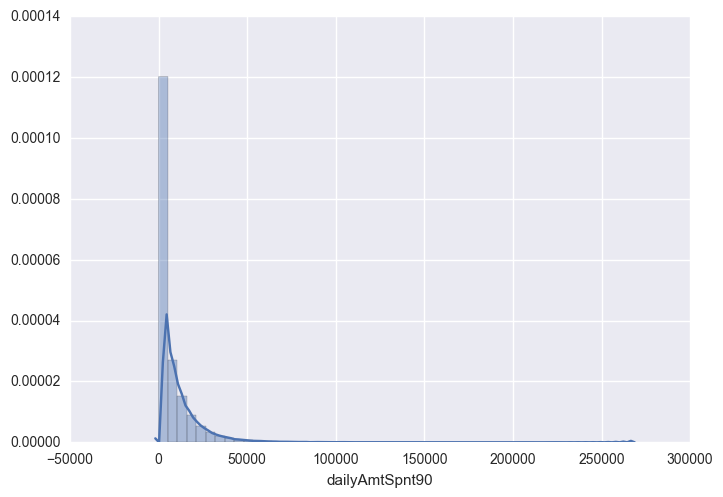

In [65]:
sns.distplot(delinq_df[delinq_df.label == 1].dailyAmtSpnt90, kde=True, norm_hist=True)

In [130]:
delinq_df_nodup = delinq_df.drop_duplicates('mobNum', take_last=True)

/Users/Tultul/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


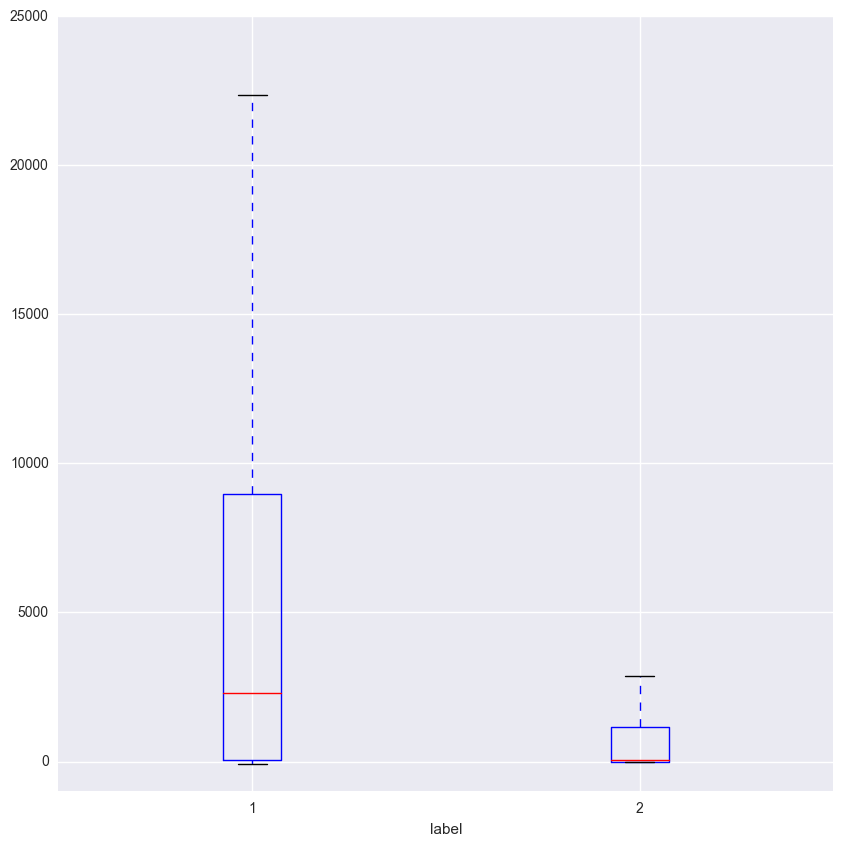

In [78]:
delinq_df_nodup1 = delinq_df_nodup[delinq_df_nodup['label'] == 1]
delinq_df_nodup1_amt = delinq_df_nodup1['dailyAmtSpnt90']
delinq_df_nodup0 = delinq_df_nodup[delinq_df_nodup['label'] == 0]
delinq_df_nodup0_amt = delinq_df_nodup0['dailyAmtSpnt90']
data = [delinq_df_nodup1_amt, delinq_df_nodup0_amt]
plt.figure()
figure = plt.figure(figsize=(10,10))
plt.ylim(-1000, 25000)
plt.xlim(0, 2)
dim=np.arange(0,1)
plt.xticks(dim)
plt.xlabel('label')
plt.boxplot(data)


plt.show()

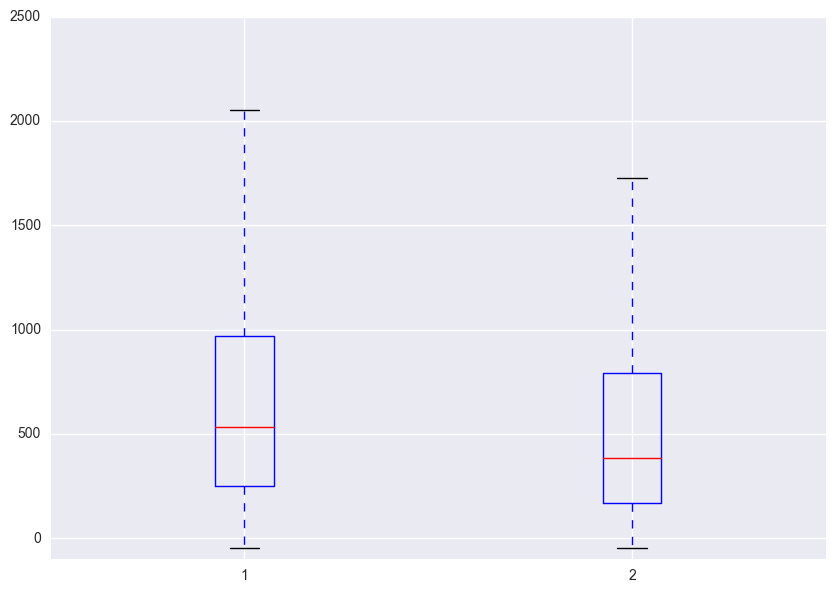

In [82]:
delinq_df_nodup1 = delinq_df_nodup[delinq_df_nodup['label'] == 1]
delinq_df_nodup1_aon = delinq_df_nodup1['ageOnCellNtwrk']
delinq_df_nodup0 = delinq_df_nodup[delinq_df_nodup['label'] == 0]
delinq_df_nodup0_aon = delinq_df_nodup0['ageOnCellNtwrk']
data = [delinq_df_nodup1_aon, delinq_df_nodup0_aon]
plt.figure()
figure = plt.figure(figsize=(10,7))
plt.ylim(-100, 2500)
plt.xlim(-1, 3)
plt.boxplot(data, 0)

plt.show()

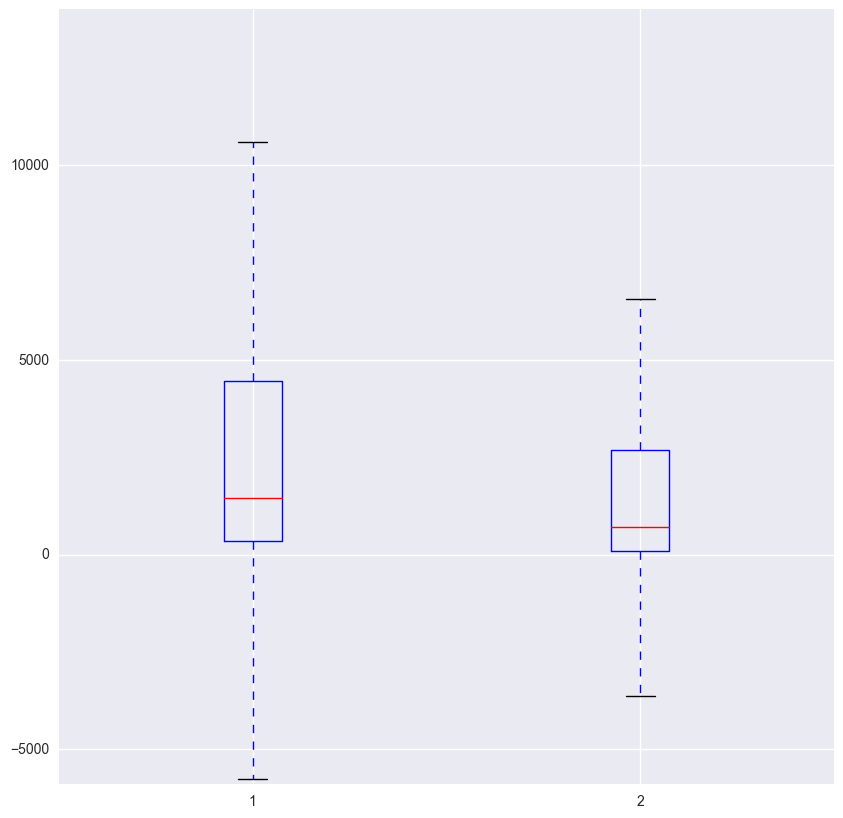

In [85]:
delinq_df_nodup1 = delinq_df_nodup[delinq_df_nodup['label'] == 1]
delinq_df_nodup1_avg = delinq_df_nodup1['avgAcntBal90']
delinq_df_nodup0 = delinq_df_nodup[delinq_df_nodup['label'] == 0]
delinq_df_nodup0_avg = delinq_df_nodup0['avgAcntBal90']
data = [delinq_df_nodup1_avg, delinq_df_nodup0_avg]
plt.figure()
figure = plt.figure(figsize=(10,10))
plt.ylim(-5900, 14000)
plt.xlim(0, 3)
plt.boxplot(data, 0)

plt.show()

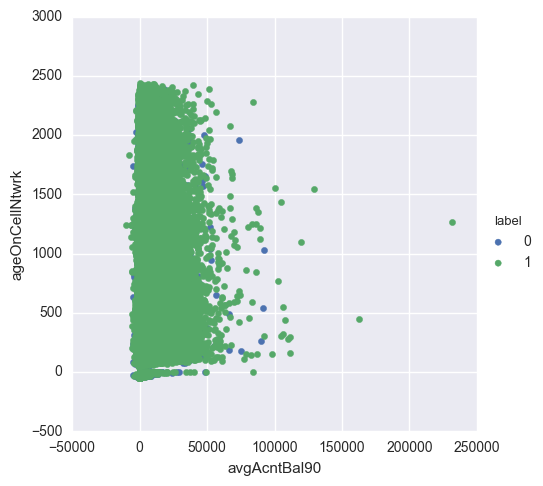

In [86]:
sns.FacetGrid(delinq_df_nodup, hue="label", size=5) \
   .map(plt.scatter, "avgAcntBal90", "ageOnCellNtwrk") \
   .add_legend()

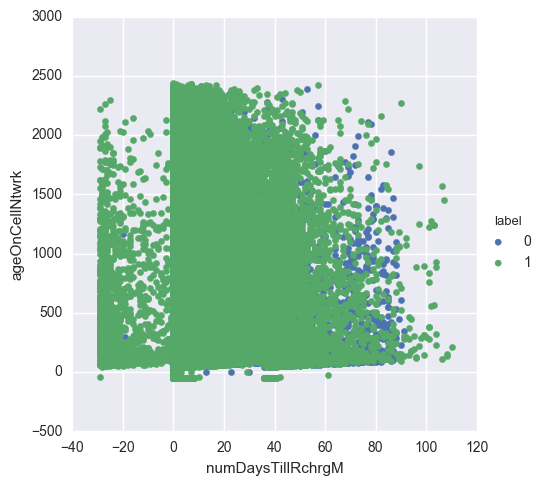

In [87]:
sns.FacetGrid(delinq_df_nodup, hue="label", size=5) \
   .map(plt.scatter, "numDaysTillRchrgM", "ageOnCellNtwrk") \
   .add_legend()

In [139]:
delinq_df = pd.read_csv('~/Downloads/DelinqData_250K.csv')

In [140]:
old_names = ['label', 'msisdn', 'aon', 'daily_decr90',                 
              'rental90', 'last_rech_date_ma',                  
             'last_rech_amt_ma',                   
             'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',                 
              'cnt_loans90',                 
              'amnt_loans90',  'maxamnt_loans90', 'payback90',                  
             'daily_decr30', 'rental30', 'last_rech_date_da', 'cnt_ma_rech30','sumamnt_ma_rech30', 'fr_ma_rech30',                   
             'cnt_loans30', 'cnt_da_rech30', 'amnt_loans30', 'maxamnt_loans30', 'payback30', 'cnt_da_rech90']

new_names =  ['label',  'mobNum',  'ageOnCellNtwrk', 'dailyAmtSpnt90',                   
              'avgAcntBal90', 'numDaysTillRchrgM',                     
              'amtLastRchrgM',                     
              'numRchrgM90', 'frqMRchrg90',  'totAmtRchrgM90',                   
               'numLoans90',                  
               'amtLoans90',  'maxAmtLoans90', 'avgPaybkTmDyIn90',                  
              'dailyAmtSpnt30', 'avgAcntBal30', 'numDaysTillRchrgD', 'numTimesMRchrg30', 'totAmtRchrgM30','frqMRchrg30',                    
              'numLoans30','numTimesDRchrg30', 'amtLoans30', 'maxAmtLoans30', 'avgPaybkTmDyIn30', 'numTimesDRchrg90']

In [141]:
delinq_df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [142]:
delinq_df.drop(['dailyAmtSpnt30', 'avgAcntBal30', 'numDaysTillRchrgD', 'numTimesMRchrg30', 'totAmtRchrgM30','frqMRchrg30', 'numLoans30','numTimesDRchrg30', 'amtLoans30', 'maxAmtLoans30', 'avgPaybkTmDyIn30', 'numTimesDRchrg90'], axis=1, inplace=True)

In [143]:
delinq_df['dailyAmtSpnt90'] = delinq_df['dailyAmtSpnt90'].round(2)

# delinq_df['avgPaybkTmDyIn30'] = delinq_df['avgPaybkTmDyIn30'].round(2)
# delinq_df['avgPaybkTmDyIn90'] = delinq_df['avgPaybkTmDyIn90'].round(2)

delinq_df['amtLastRchrgM'].fillna(0, inplace=True)
delinq_df['numDaysTillRchrgM'].fillna(0, inplace=True)
delinq_df['frqMRchrg90'].fillna(0, inplace=True)
delinq_df['amtLastRchrgM'].fillna(0, inplace=True)
delinq_df['numDaysTillRchrgM'].fillna(0, inplace=True)
delinq_df['maxAmtLoans90'].fillna(0, inplace=True)
delinq_df['avgPaybkTmDyIn90'].fillna(0, inplace=True)

delinq_df['numDaysTillRchrgM'] = delinq_df['numDaysTillRchrgM'].astype(int)

In [144]:
delinq_df.drop_duplicates('mobNum', keep='last', inplace=True)

In [145]:
delinq_df.head()

label      mobNum  ageOnCellNtwrk  dailyAmtSpnt90  avgAcntBal90  \
0      1  8535032161            1072         9191.40       2007.28   
1      1  8535032225             212          153.38       1029.21   
2      1  8535032320            1023           22.49         90.00   
3      1  8535032615             944        24874.70       6347.61   
4      1  8535032778             660         1254.20       1847.36   

   numDaysTillRchrgM  amtLastRchrgM  numRchrgM90  frqMRchrg90  totAmtRchrgM90  \
0                  7          773.0           10          5.0           10897   
1                  2          770.0           19          1.0           17747   
2                  7         2309.0            2         59.0            4029   
3                  5         4048.0            2          7.0            9835   
4                  3          770.0            1          0.0             770   

   numLoans90  amtLoans90  maxAmtLoans90  avgPaybkTmDyIn90  
0           2          12            6.0               2.0  
1           1           6            6.0               0.0  
2           2          12            6.0               0.0  
3           1           6            6.0               0.0  
4           2          12            6.0               0.0

In [150]:
bins = [-75, 0, 200, 400, 600, 3000]

In [151]:
group_names = ['Low', 'Med', 'AbvAvg', 'High', 'AbvHigh']

In [152]:
age_buckets = pd.cut(delinq_df['ageOnCellNtwrk'], bins, labels=group_names)

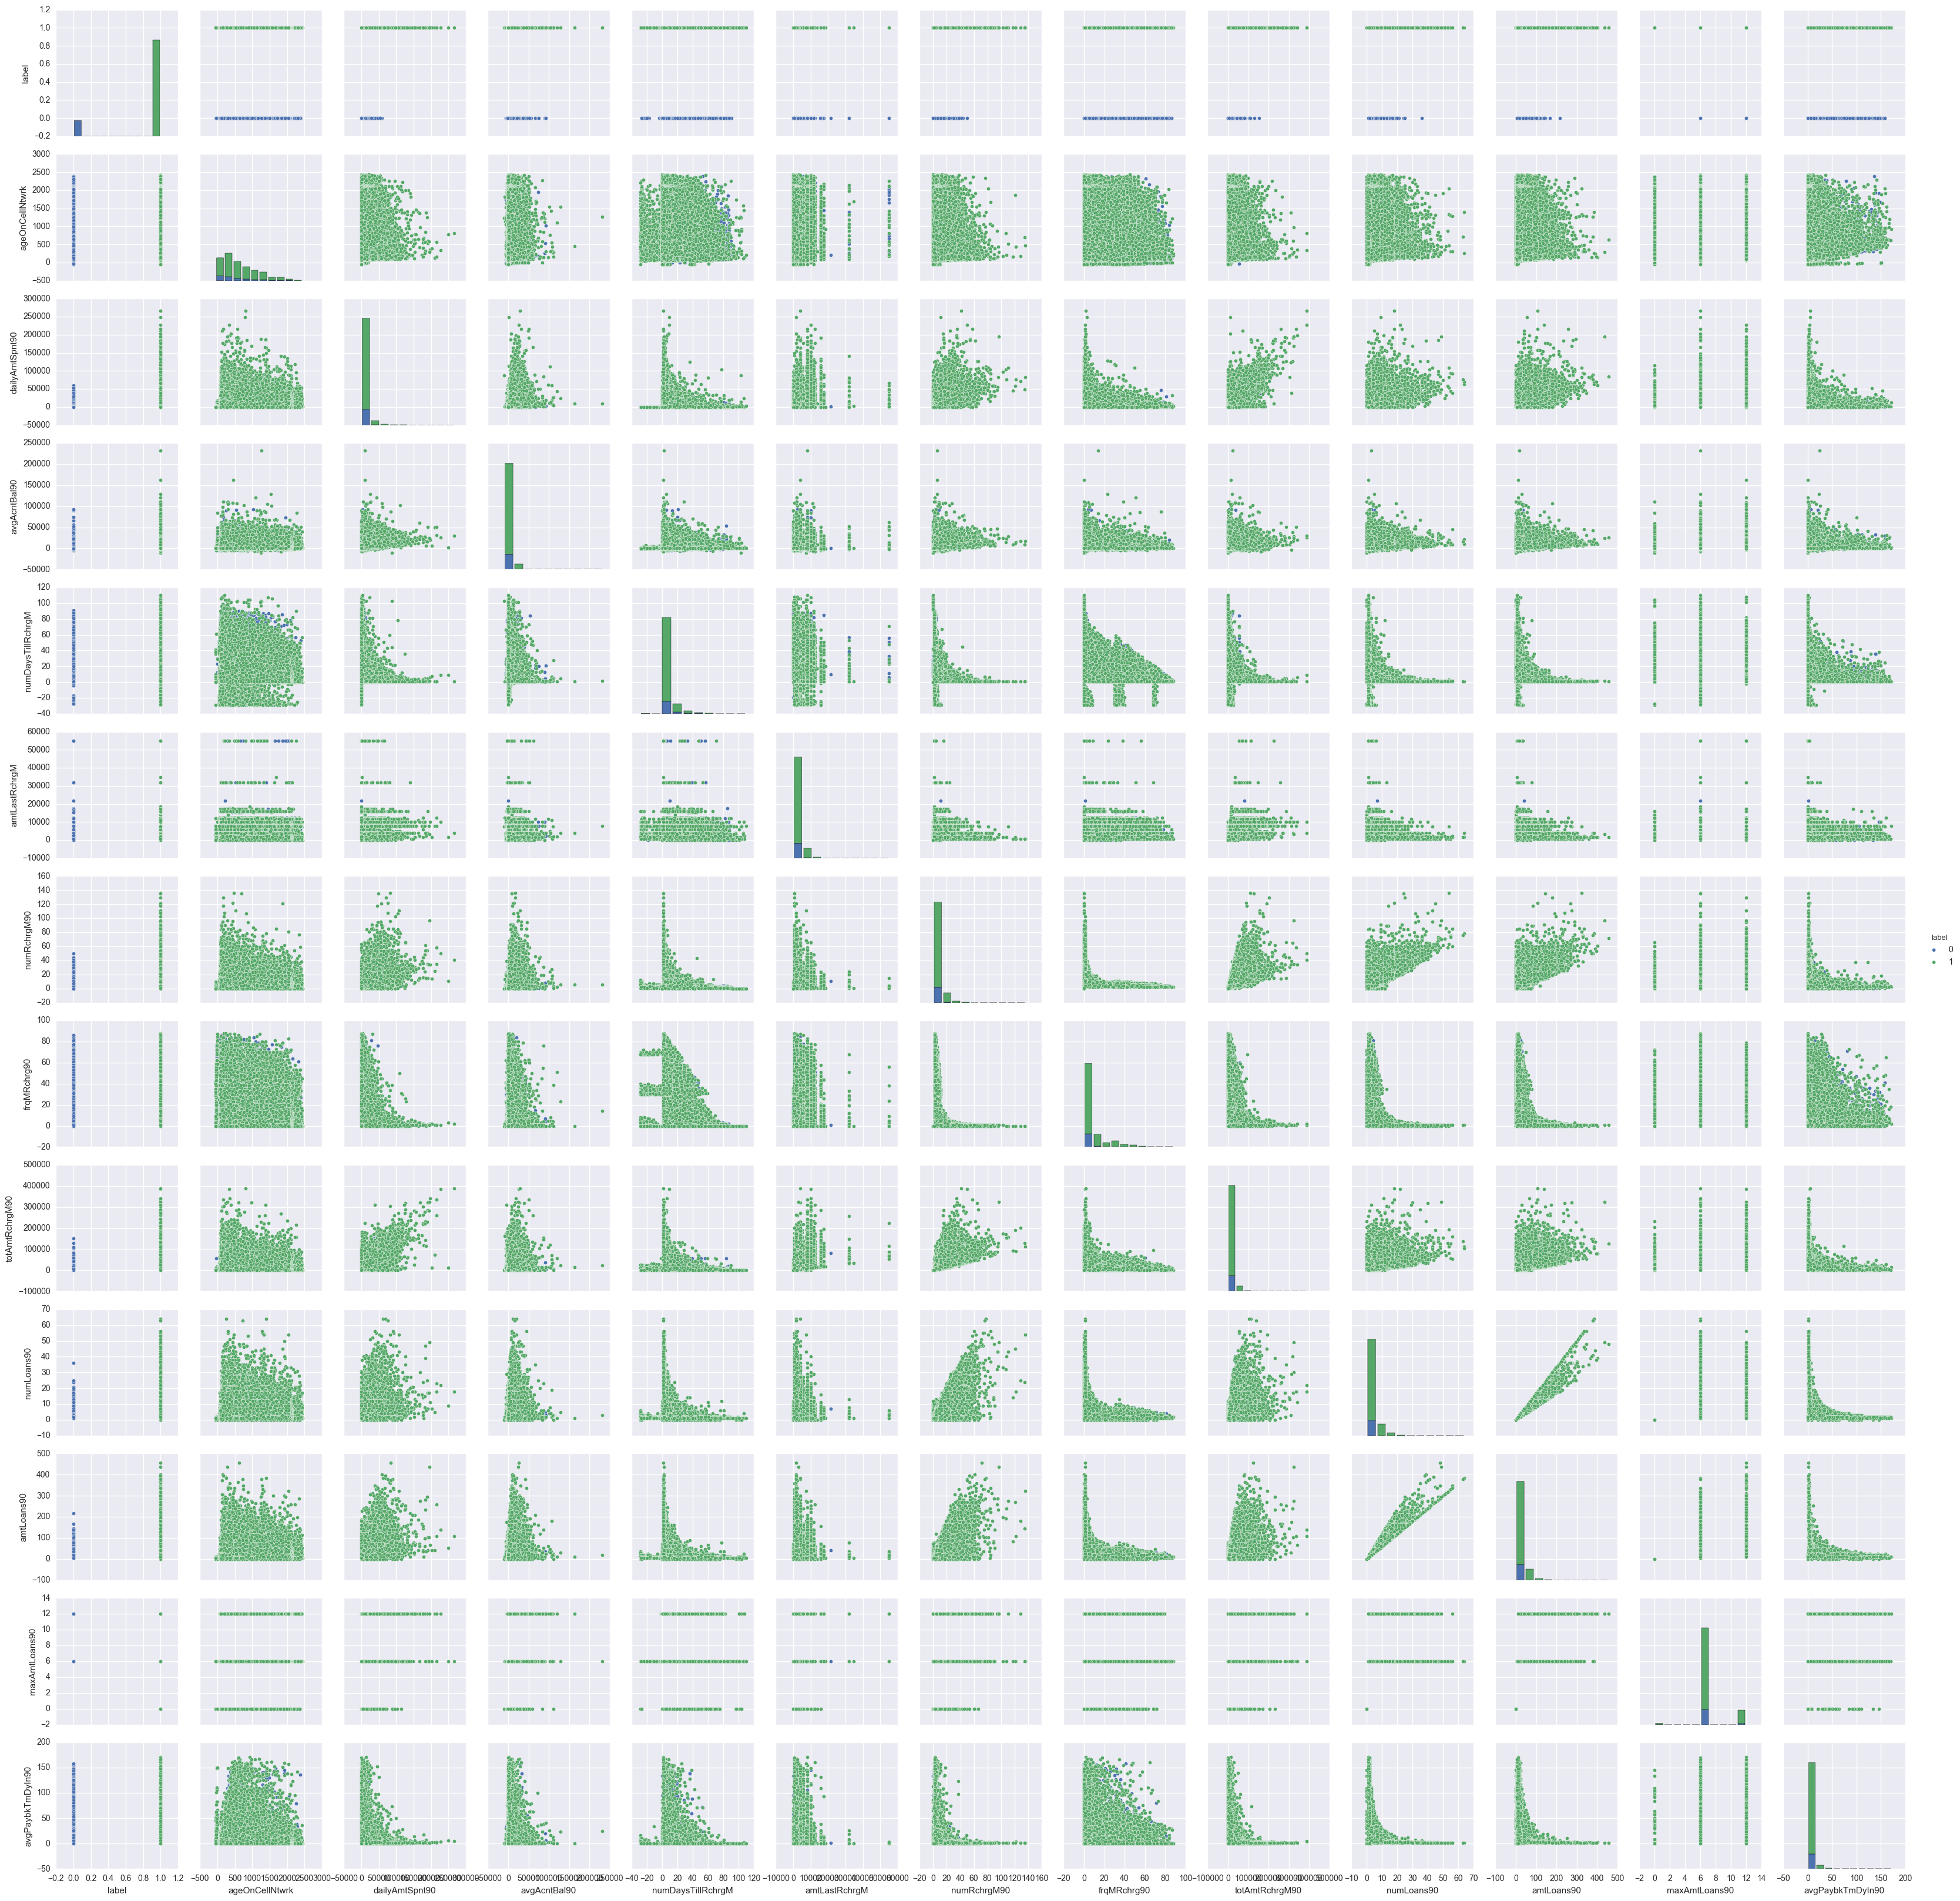

In [157]:
sns.pairplot(delinq_df_nodup.drop("mobNum", axis=1),hue='label')

In [159]:
age_buckets

0         AbvHigh
1          AbvAvg
2         AbvHigh
3         AbvHigh
4         AbvHigh
5         AbvHigh
6         AbvHigh
7          AbvAvg
8             Med
9          AbvAvg
10         AbvAvg
11         AbvAvg
12        AbvHigh
13        AbvHigh
14        AbvHigh
15            Med
16         AbvAvg
17        AbvHigh
18         AbvAvg
21        AbvHigh
23        AbvHigh
24         AbvAvg
25        AbvHigh
26         AbvAvg
27        AbvHigh
28        AbvHigh
29        AbvHigh
30           High
31        AbvHigh
32            Med
           ...   
249969        Med
249970     AbvAvg
249971    AbvHigh
249972    AbvHigh
249973    AbvHigh
249974    AbvHigh
249975     AbvAvg
249976     AbvAvg
249977       High
249978        Med
249979       High
249980       High
249982        Med
249983    AbvHigh
249984     AbvAvg
249985    AbvHigh
249986    AbvHigh
249987        Med
249988    AbvHigh
249989     AbvAvg
249990    AbvHigh
249991    AbvHigh
249992    AbvHigh
249993        Low
249994    

In [158]:
delinq_df.head()

label      mobNum  ageOnCellNtwrk  dailyAmtSpnt90  avgAcntBal90  \
0      1  8535032161            1072         9191.40       2007.28   
1      1  8535032225             212          153.38       1029.21   
2      1  8535032320            1023           22.49         90.00   
3      1  8535032615             944        24874.70       6347.61   
4      1  8535032778             660         1254.20       1847.36   

   numDaysTillRchrgM  amtLastRchrgM  numRchrgM90  frqMRchrg90  totAmtRchrgM90  \
0                  7          773.0           10          5.0           10897   
1                  2          770.0           19          1.0           17747   
2                  7         2309.0            2         59.0            4029   
3                  5         4048.0            2          7.0            9835   
4                  3          770.0            1          0.0             770   

   numLoans90  amtLoans90  maxAmtLoans90  avgPaybkTmDyIn90  
0           2          12            6.0               2.0  
1           1           6            6.0               0.0  
2           2          12            6.0               0.0  
3           1           6            6.0               0.0  
4           2          12            6.0               0.0

In [160]:
group_names

['Low', 'Med', 'AbvAvg', 'High', 'AbvHigh']

In [162]:
#age_buckets = pd.cut(delinq_df_nodup['ageOnCellNtwrk'], bins, labels=group_names)
delinq_df['age_buckets'] = pd.cut(delinq_df['ageOnCellNtwrk'], bins, labels=group_names)

In [163]:
pd.value_counts(delinq_df['age_buckets'])

AbvHigh    97103
AbvAvg     45963
Med        43403
High       33427
Low         1741
Name: age_buckets, dtype: int64

In [164]:
dummy_vars_age = pd.get_dummies(delinq_df['age_buckets'], prefix='age_buckets')

In [165]:
dummy_vars_age.head(2)

age_buckets_Low  age_buckets_Med  age_buckets_AbvAvg  age_buckets_High  \
0              0.0              0.0                 0.0               0.0   
1              0.0              0.0                 1.0               0.0   

   age_buckets_AbvHigh  
0                  1.0  
1                  0.0

In [95]:
dummy_vars_age.head(2)

age_buckets_Low  age_buckets_Med  age_buckets_AbvAvg  age_buckets_High  \
0              0.0              0.0                 0.0               0.0   
1              0.0              0.0                 1.0               0.0   

   age_buckets_AbvHigh  
0                  0.0  
1                  0.0

In [166]:
dummy_vars_age.drop('age_buckets_Low', axis=1, inplace=True)
dummy_vars_age.head()

age_buckets_Med  age_buckets_AbvAvg  age_buckets_High  age_buckets_AbvHigh
0              0.0                 0.0               0.0                  1.0
1              0.0                 1.0               0.0                  0.0
2              0.0                 0.0               0.0                  1.0
3              0.0                 0.0               0.0                  1.0
4              0.0                 0.0               0.0                  1.0

In [167]:
delinq_df.drop('ageOnCellNtwrk', axis=1, inplace=True)
delinq_df_age = pd.concat([delinq_df, dummy_vars_age], axis=1)
delinq_df_age.head()

label      mobNum  dailyAmtSpnt90  avgAcntBal90  numDaysTillRchrgM  \
0      1  8535032161         9191.40       2007.28                  7   
1      1  8535032225          153.38       1029.21                  2   
2      1  8535032320           22.49         90.00                  7   
3      1  8535032615        24874.70       6347.61                  5   
4      1  8535032778         1254.20       1847.36                  3   

   amtLastRchrgM  numRchrgM90  frqMRchrg90  totAmtRchrgM90  numLoans90  \
0          773.0           10          5.0           10897           2   
1          770.0           19          1.0           17747           1   
2         2309.0            2         59.0            4029           2   
3         4048.0            2          7.0            9835           1   
4          770.0            1          0.0             770           2   

   amtLoans90  maxAmtLoans90  avgPaybkTmDyIn90 age_buckets  age_buckets_Med  \
0          12            6.0               2.0     AbvHigh              0.0   
1           6            6.0               0.0      AbvAvg              0.0   
2          12            6.0               0.0     AbvHigh              0.0   
3           6            6.0               0.0     AbvHigh              0.0   
4          12            6.0               0.0     AbvHigh              0.0   

   age_buckets_AbvAvg  age_buckets_High  age_buckets_AbvHigh  
0                 0.0               0.0                  1.0  
1                 1.0               0.0                  0.0  
2                 0.0               0.0                  1.0  
3                 0.0               0.0                  1.0  
4                 0.0               0.0                  1.0

In [172]:
delinq_df_age.head(2)

label      mobNum  dailyAmtSpnt90  avgAcntBal90  numDaysTillRchrgM  \
0      1  8535032161         9191.40       2007.28                  7   
1      1  8535032225          153.38       1029.21                  2   

   amtLastRchrgM  numRchrgM90  frqMRchrg90  totAmtRchrgM90  numLoans90  \
0          773.0           10          5.0           10897           2   
1          770.0           19          1.0           17747           1   

   amtLoans90  maxAmtLoans90  avgPaybkTmDyIn90  age_buckets_Med  \
0          12            6.0               2.0              0.0   
1           6            6.0               0.0              0.0   

   age_buckets_AbvAvg  age_buckets_High  age_buckets_AbvHigh  
0                 0.0               0.0                  1.0  
1                 1.0               0.0                  0.0

In [178]:
delinq_df_age.drop('mobNum', axis=1, inplace=True)

In [179]:
X = delinq_df_age.drop('label', axis=1)

In [180]:
y = delinq_df_age['label']

In [181]:
modeld = Logit(y, X)

In [182]:
modeld = modeld.fit()
modeld.summary()

Optimization terminated successfully.
         Current function value: 0.322991
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:               221637
Model:                          Logit   Df Residuals:                   221622
Method:                           MLE   Df Model:                           14
Date:                Fri, 03 Feb 2017   Pseudo R-squ.:                  0.2024
Time:                        16:11:15   Log-Likelihood:                -71587.
converged:                       True   LL-Null:                       -89753.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
dailyAmtSpnt90       5.691e-05   2.81e-06     20.287      0.000      5.14e-05  6.24e-05
avgAcntBal90        -3.544e-05   1.44e-06    -24.543      0.000     -3.83e-05 -3.26e-05
numDaysTillRchrgM      -0.0157      0.001    -28.324      0.000        -0.017    -0.015
amtLastRchrgM           0.0002   5.32e-06     32.521      0.000         0.000     0.000
numRchrgM90             0.2613      0.005     51.909      0.000         0.251     0.271
frqMRchrg90             0.0139      0.001     23.242      0.000         0.013     0.015
totAmtRchrgM90      -2.246e-06   2.23e-06     -1.005      0.315     -6.62e-06  2.13e-06
numLoans90             -0.2161      0.043     -5.023      0.000        -0.300    -0.132
amtLoans90              0.0553      0.007      7.673      0.000         0.041     0.069
maxAmtLoans90          -0.0612      0.006     -9.730      0.000        -0.074    -0.049
avgPaybkTmDyIn90       -0.0027      0.001     -4.536      0.000        -0.004    -0.002
age_buckets_Med         0.4225      0.040     10.608      0.000         0.344     0.501
age_buckets_AbvAvg      0.6644      0.040     16.419      0.000         0.585     0.744
age_buckets_High        0.7750      0.042     18.572      0.000         0.693     0.857
age_buckets_AbvHigh     0.9608      0.039     24.333      0.000         0.883     1.038
=======================================================================================
"""

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import KFold

model_d1 = LogisticRegression()
model_d1.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [196]:
predictions = model_d1.predict(X)
print "LR Accuracy:", accuracy_score(y, predictions)
print "LR Precision:", precision_score(y, predictions)
print "LR Recall:", recall_score(y, predictions)
print "LR F1 Score:", f1_score(y, predictions)

LR Accuracy: 0.858981126797
LR Precision: 0.860891936697
LR Recall: 0.9971512363
LR F1 Score: 0.924025309502


In [187]:
predictions = model_d1.predict_proba(X)

In [188]:
predictions = predictions[:, 1]

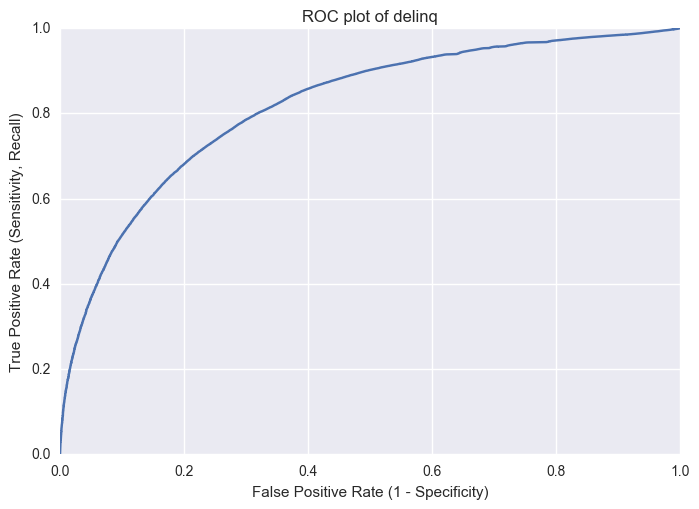

In [190]:
fpr, tpr, threshold = roc_curve(y, predictions)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of delinq")
plt.show()

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score
from sklearn.cross_validation import KFold

model_df1 = RandomForestClassifier(n_estimators=35)
model_df1.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
predictions = model_df1.predict(X)
print "RF Accuracy:", accuracy_score(y, predictions)
print "Precision:", precision_score(y, predictions)
print "Recall:", recall_score(y, predictions)
print "Recall:", f1_score(y, predictions)

RF Accuracy: 0.995510677369
Precision: 0.99764319308
Recall: 0.997135497275
Recall: 0.99738928057


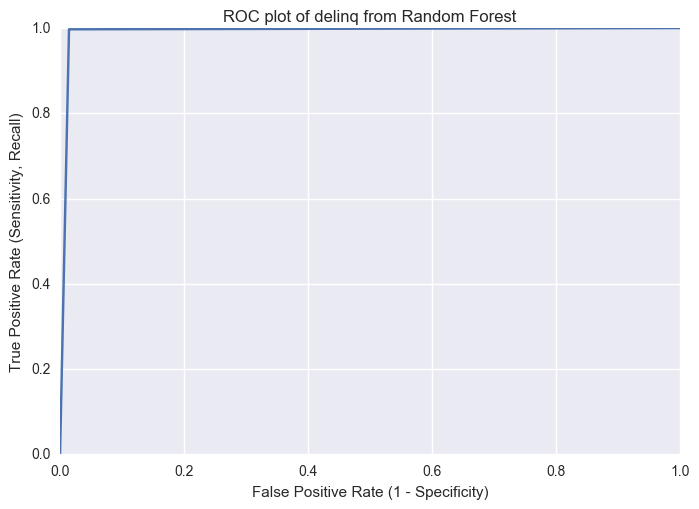

In [198]:
fpr, tpr, threshold = roc_curve(y, predictions)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of delinq from Random Forest")
plt.show()

In [204]:
delinq_df_nodup.head(2) # Dropped many columns

label      mobNum  ageOnCellNtwrk  avgAcntBal90  amtLastRchrgM  \
0      1  8535032161            1072       2007.28          773.0   
1      1  8535032225             212       1029.21          770.0   

   numRchrgM90  totAmtRchrgM90  numLoans90  amtLoans90  maxAmtLoans90  
0           10           10897           2          12            6.0  
1           19           17747           1           6            6.0

In [206]:
delinq_df.head(2)

label      mobNum  dailyAmtSpnt90  avgAcntBal90  numDaysTillRchrgM  \
0      1  8535032161         9191.40       2007.28                  7   
1      1  8535032225          153.38       1029.21                  2   

   amtLastRchrgM  numRchrgM90  frqMRchrg90  totAmtRchrgM90  numLoans90  \
0          773.0           10          5.0           10897           2   
1          770.0           19          1.0           17747           1   

   amtLoans90  maxAmtLoans90  avgPaybkTmDyIn90 age_buckets  
0          12            6.0               2.0     AbvHigh  
1           6            6.0               0.0      AbvAvg

In [207]:
pwd

u'/Users/Tultul/Dropbox/DSI_G/week10/day1'

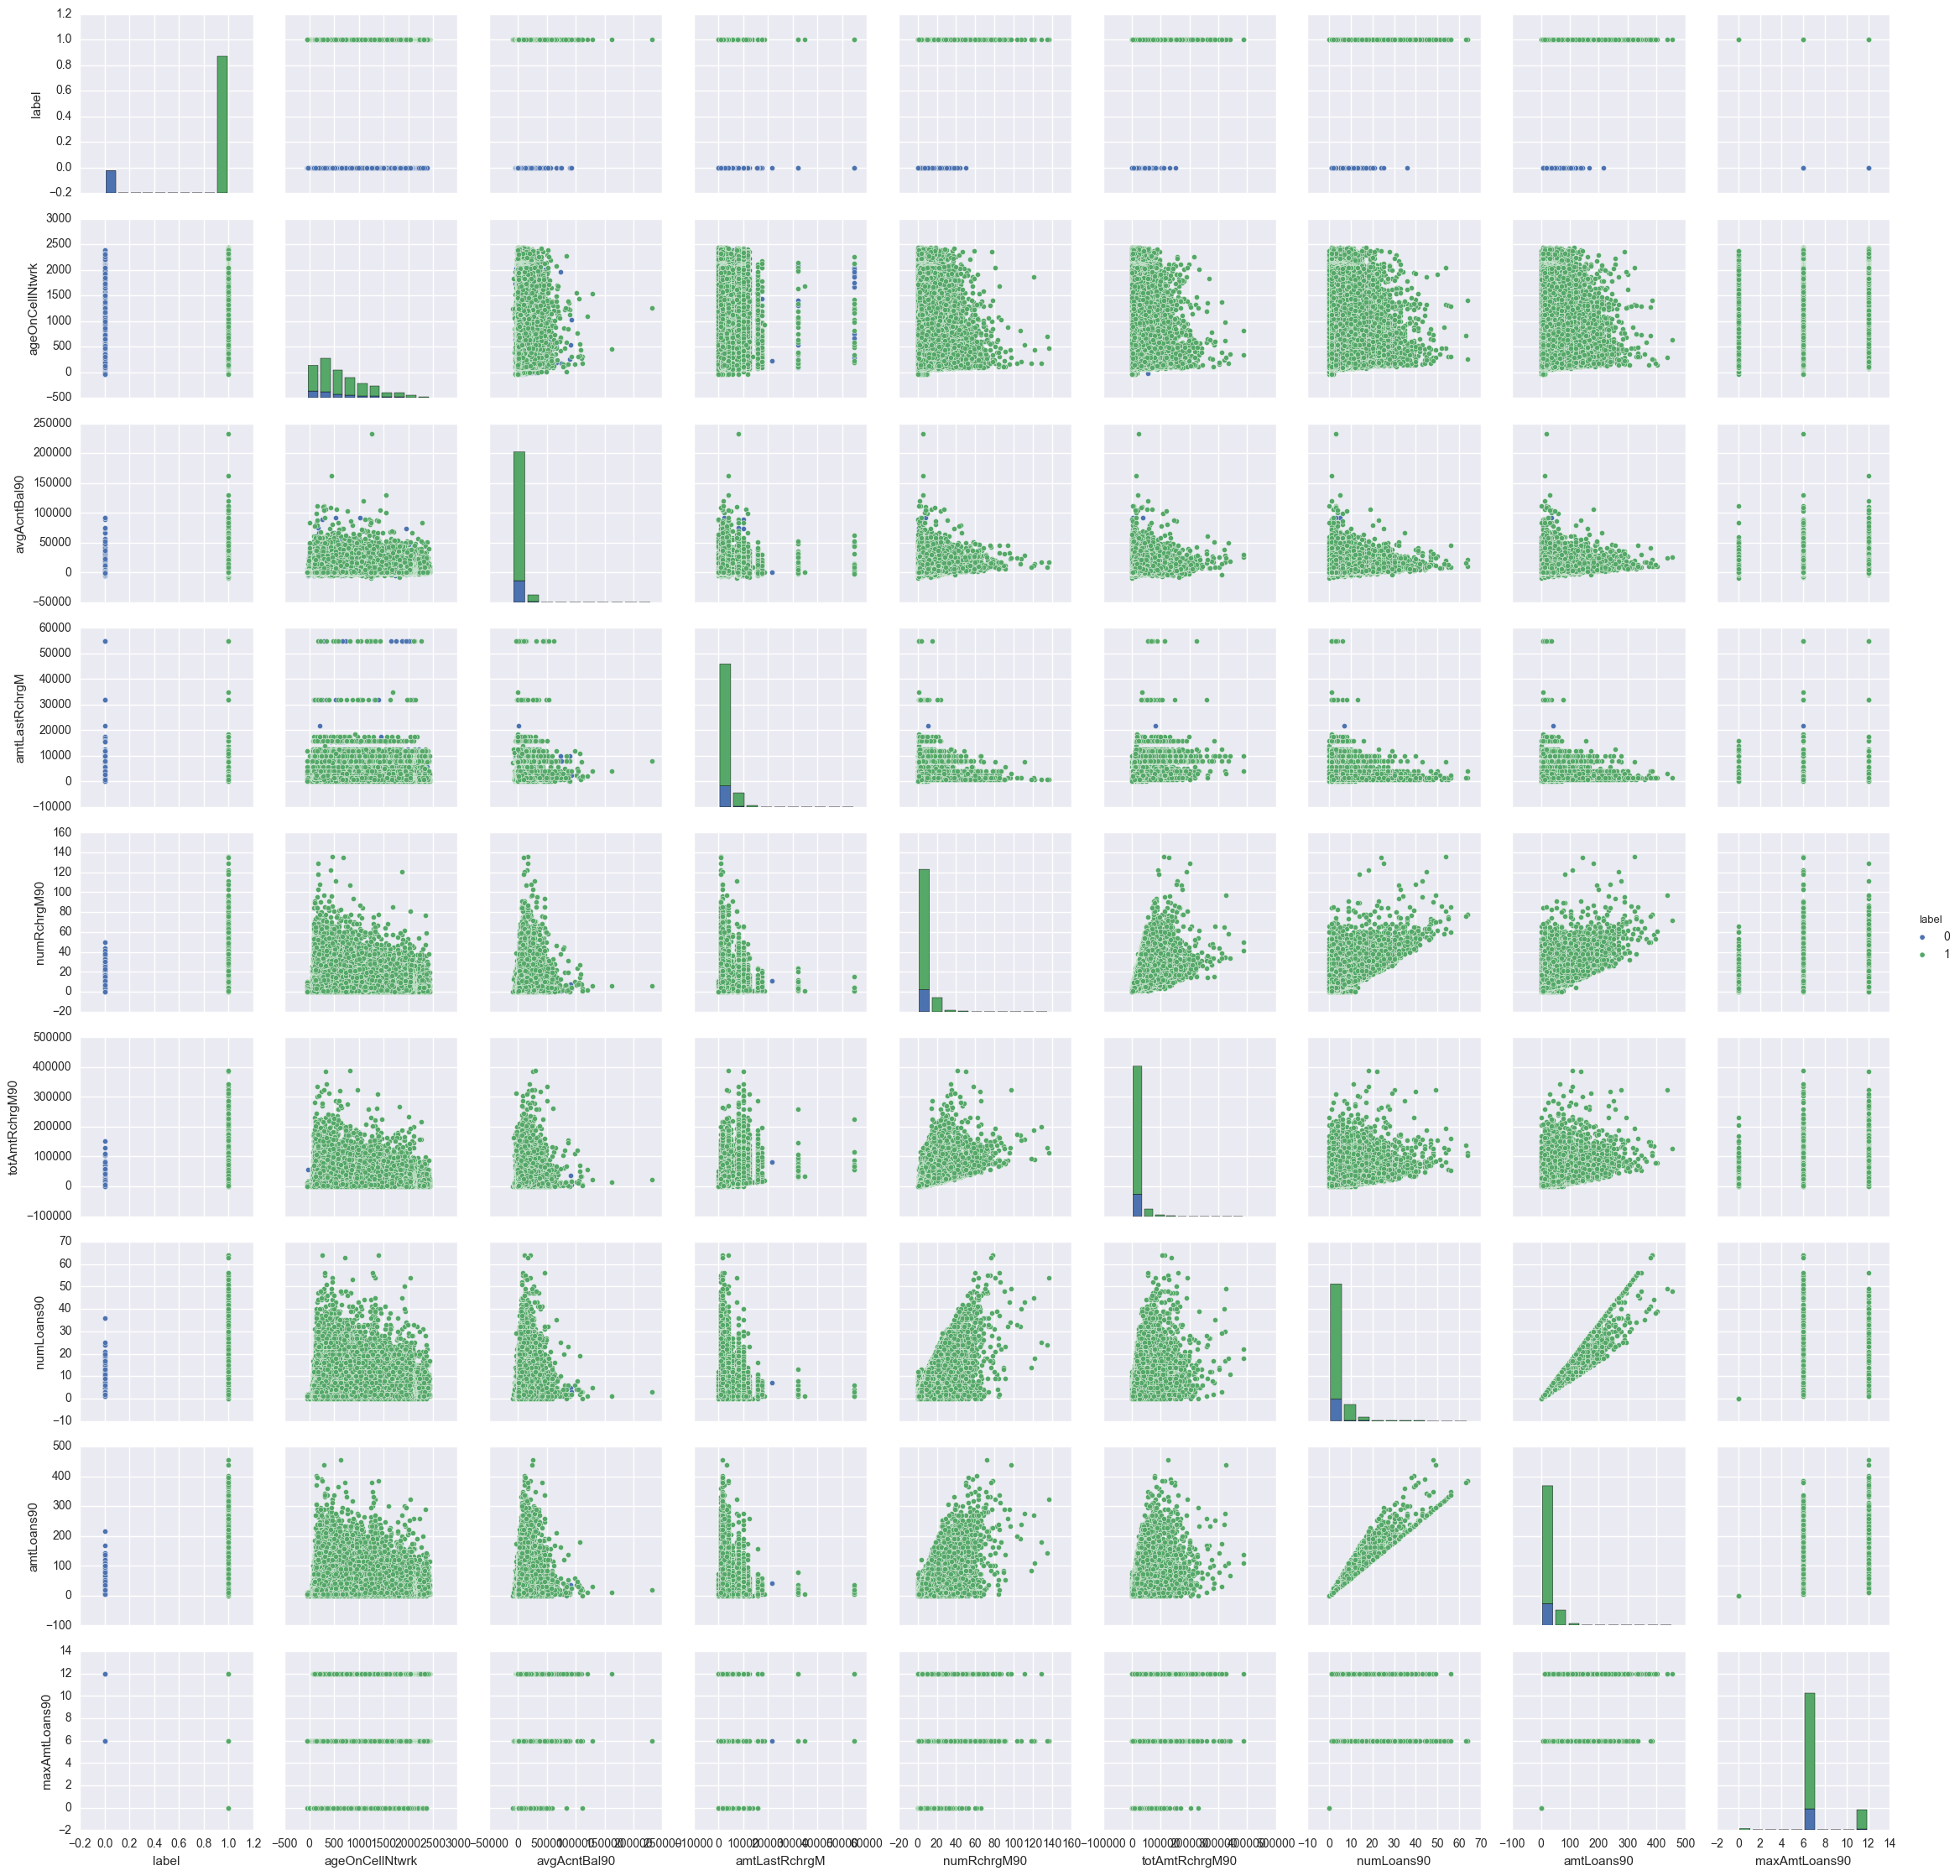

In [205]:
sns.pairplot(delinq_df_nodup.drop("mobNum", axis=1),hue='label')